# 3 Vetting TOI 1798 new candidate
We already saw in the TOI 1798 search tutorial that we found a last signal with 19.12 days period that was not alerted by SPOC. We will try to assess its quality here. For it, we need to run the next command:

`python3.8 -m sherlockpipe.vet --candidate 4`

The output of the vetting generated by `sherlock` consists on two PDF reports (a complete and a summary one) and a few csvs stored for reproducibility. In order to explore the resulting PDF page by page in this notebook we will need the `pdf2image` module.

In [1]:
! python3.8 -m pip install pdf2image

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python3.8 -m pip install --upgrade pip


Now that it is installed, let's begin with the report. We will load the summary PDF and convert it into a set of images (one image per page).

In [2]:
from pdf2image import convert_from_path
from IPython.display import Image
import os 

your_execution_dir = os.getcwd() 
# Store Pdf with convert_from_path function
images = convert_from_path(your_execution_dir + '/TIC198153540_[16,_22,_23,_49,_50]/vetting_2/TIC 198153540_transits_validation_report_summary.pdf')


Time to look into the first page, Table 3, which is the metrics alerts grid. 

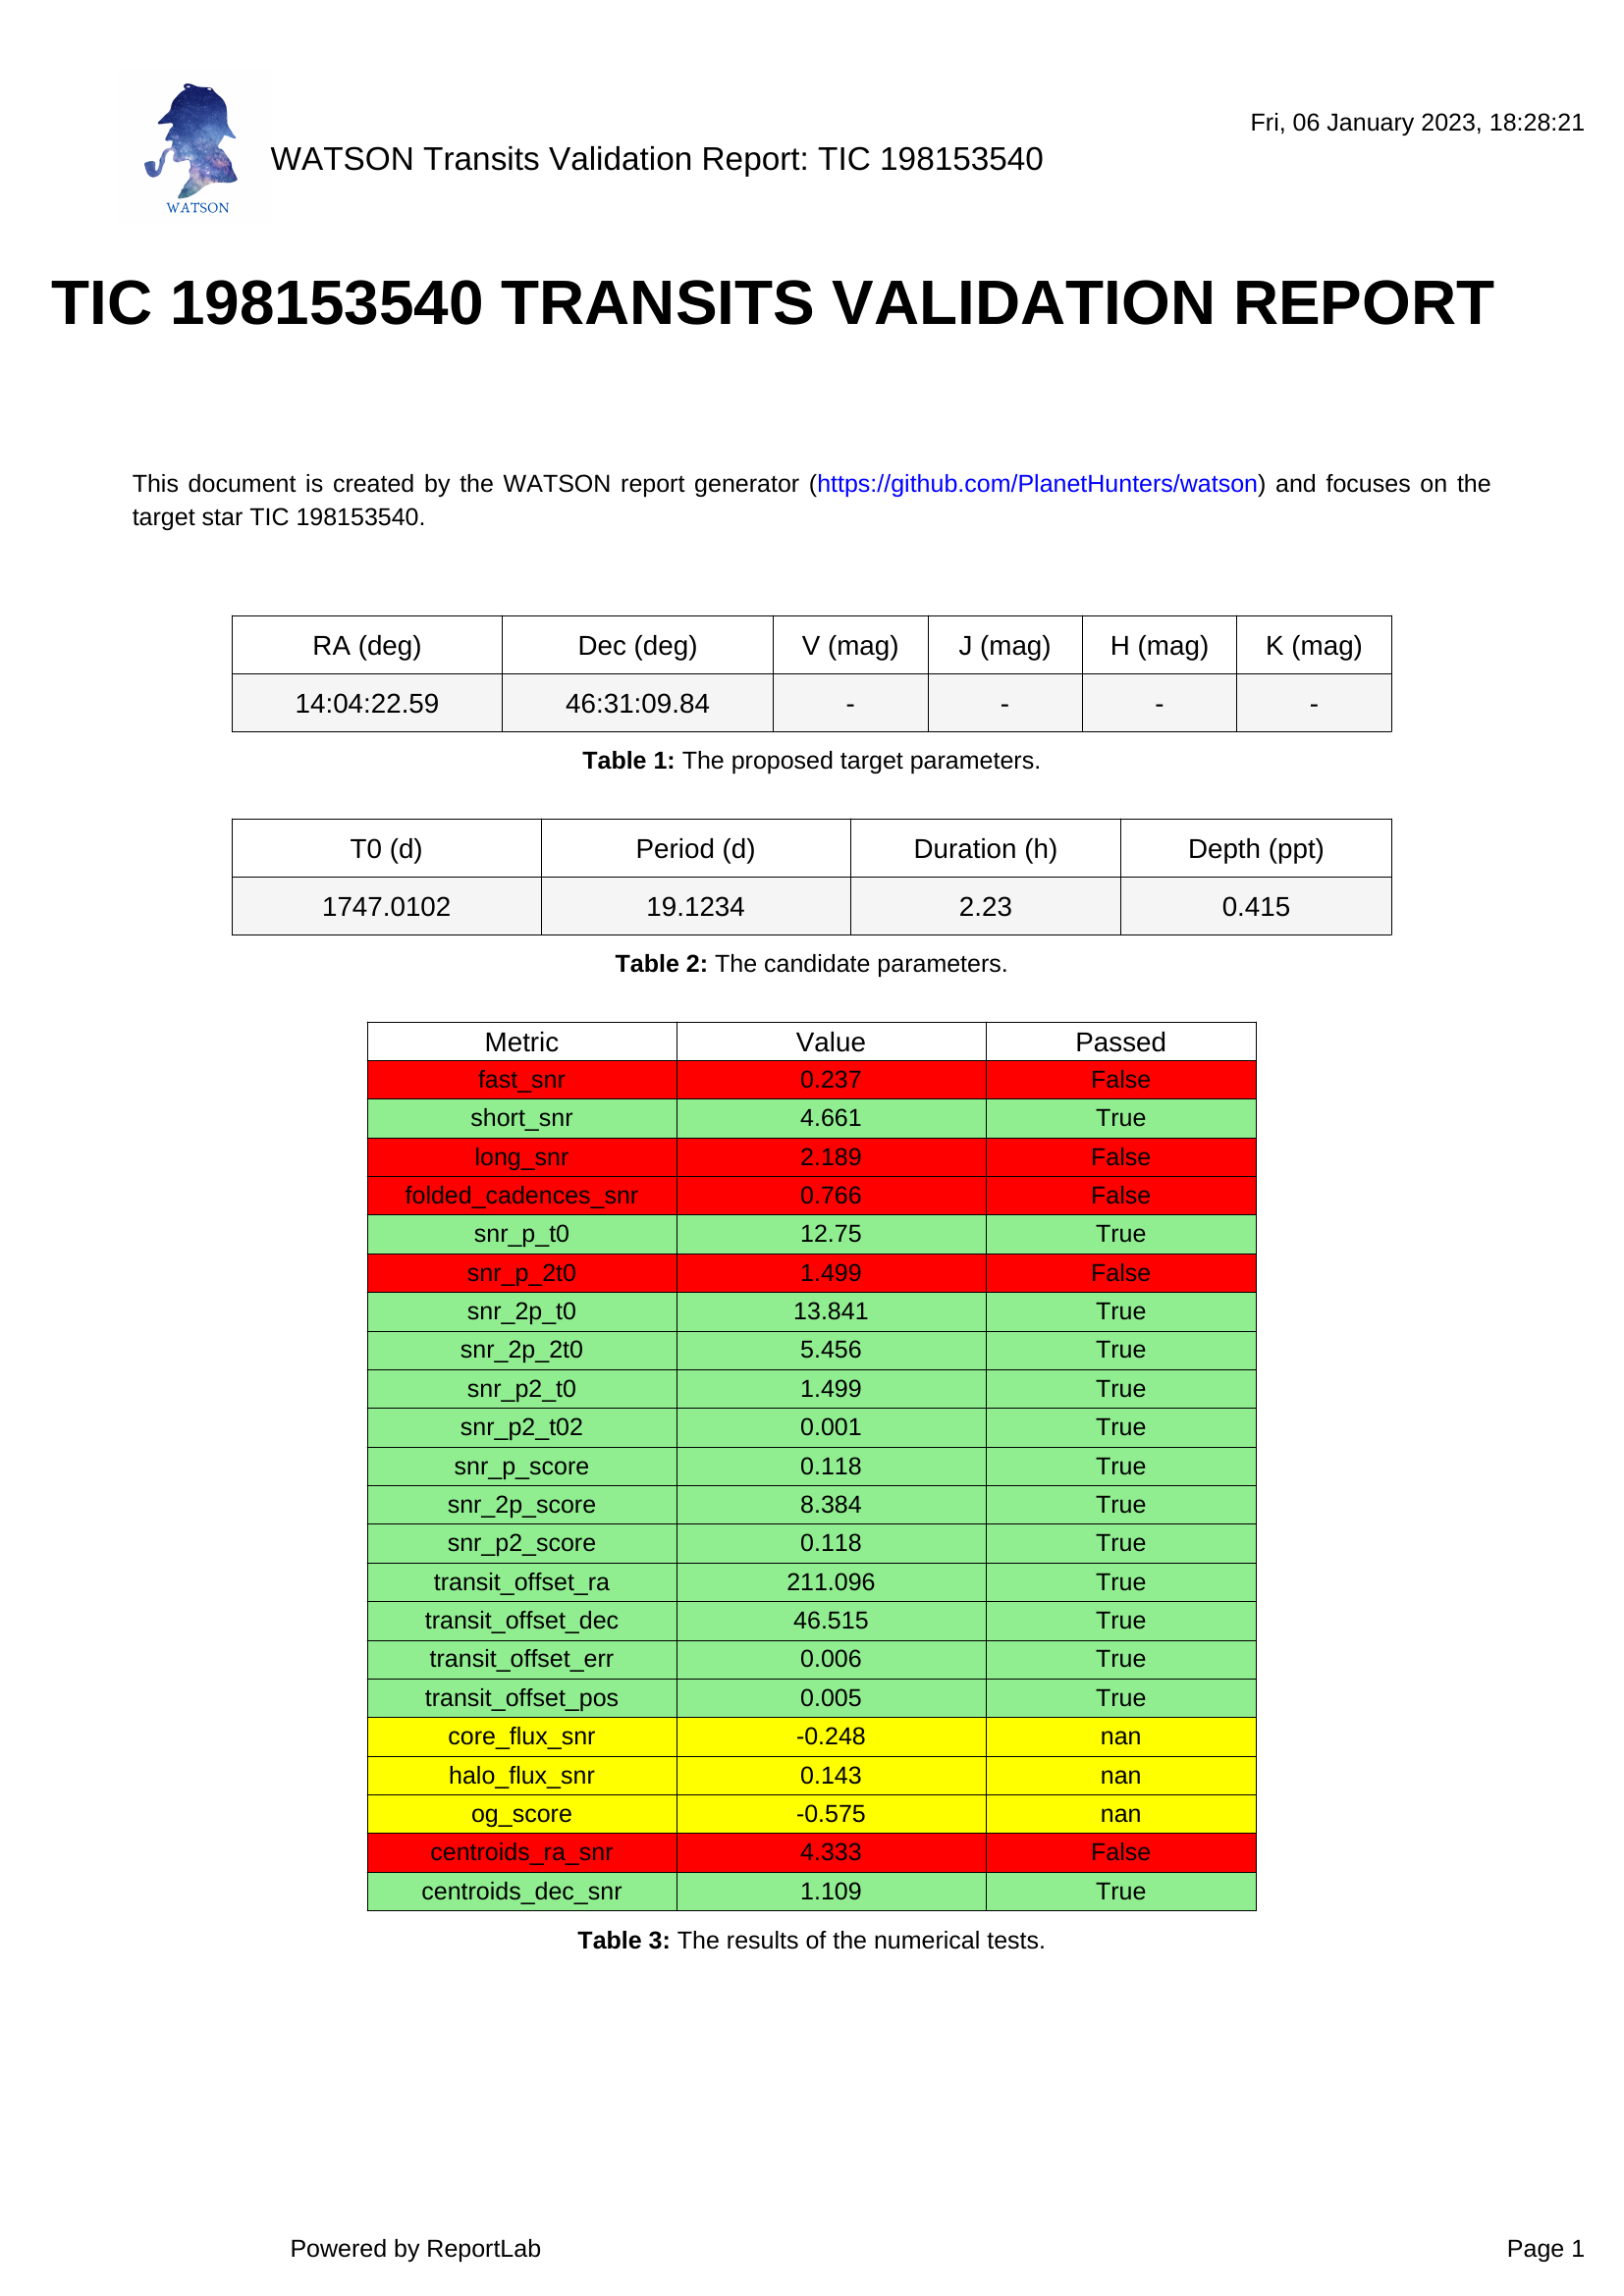

In [3]:
images[0]

We find out that `fast_snr` and `long_snr` are in bad shape, leading to a `folded_cadences_snr` alert too. `snr_p_2t0` was red when its value was less than 3, which is a bug and the metric should be green (this is fixed in latest `sherlock` versions) and we will ignore this alert. Finally, `centroids_ra_snr` is also reporting problems.

We will go to page 2 to inspect Figure 2, which shows the plots for `fast_snr`, `long_snr` and `folded_cadences_snr`.

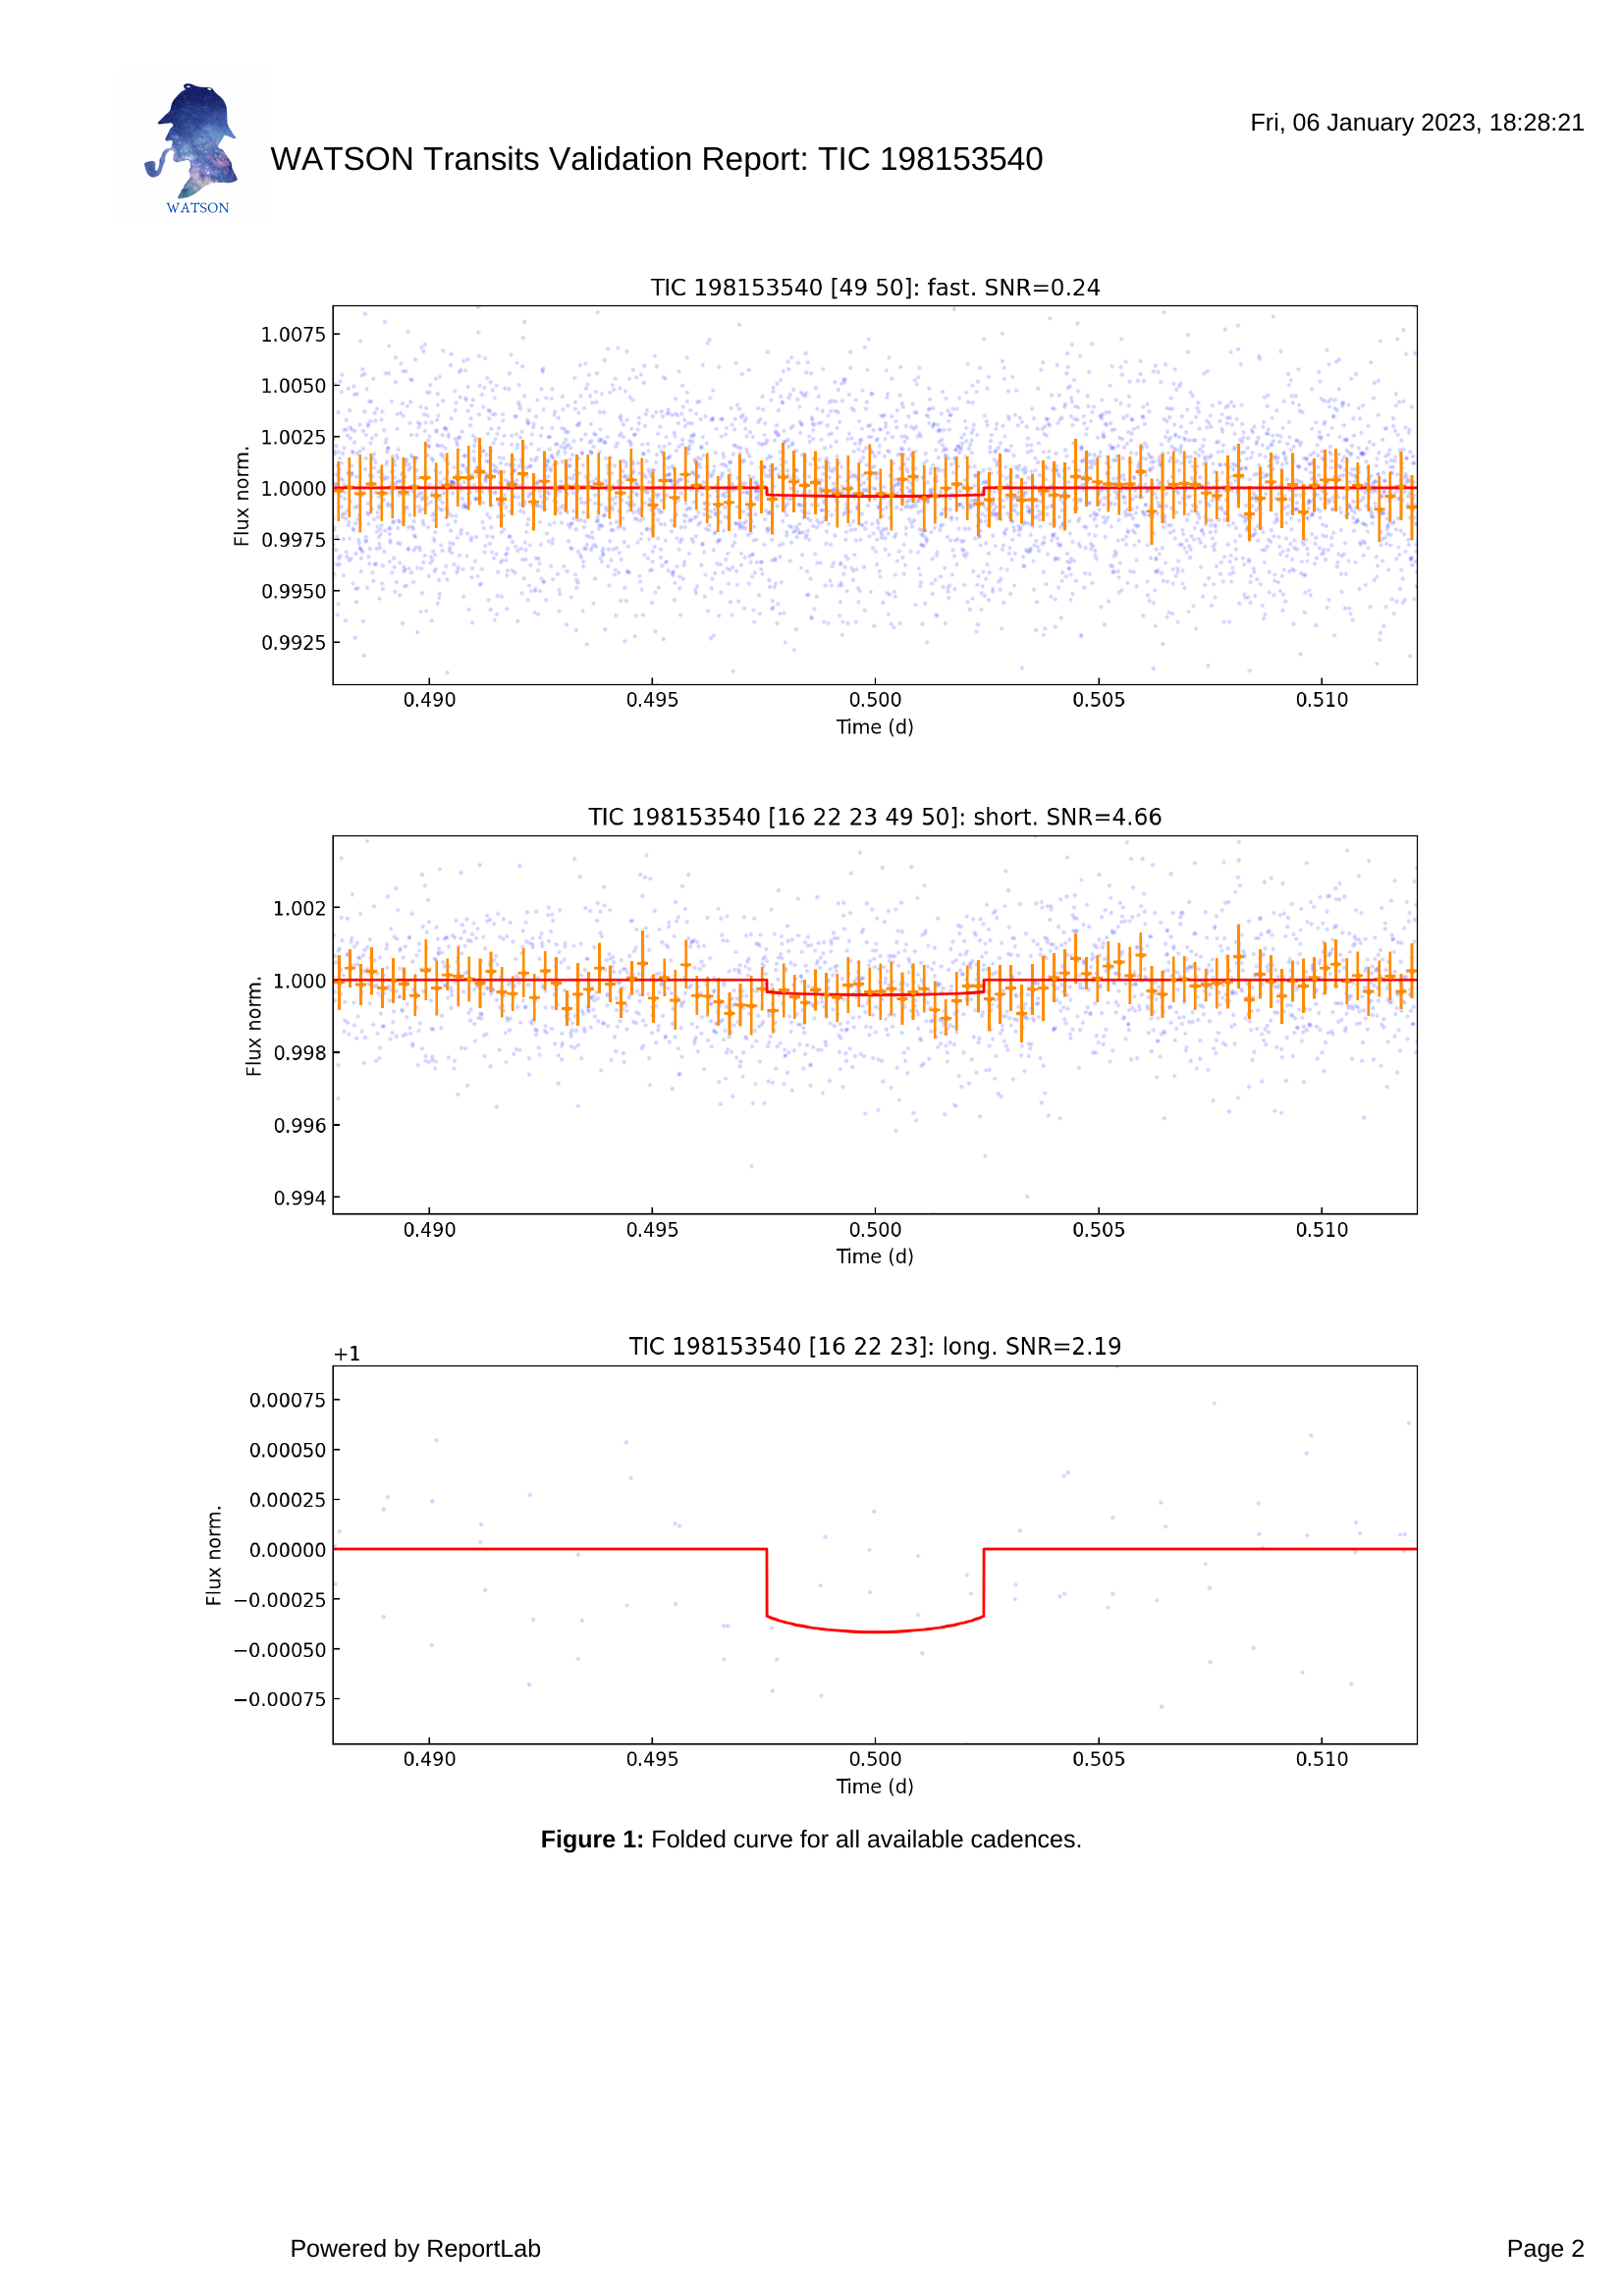

In [4]:
images[1]

The `fast_snr` value seems to be really low and there is no transit shape at all there. However, we can appreciate that the transit shape is visually observable in the `long_snr` plot, though it shows a low SNR probably due to the lack of intransit points.

The `centroid_ra_snr` metric should be inspected in forth page:

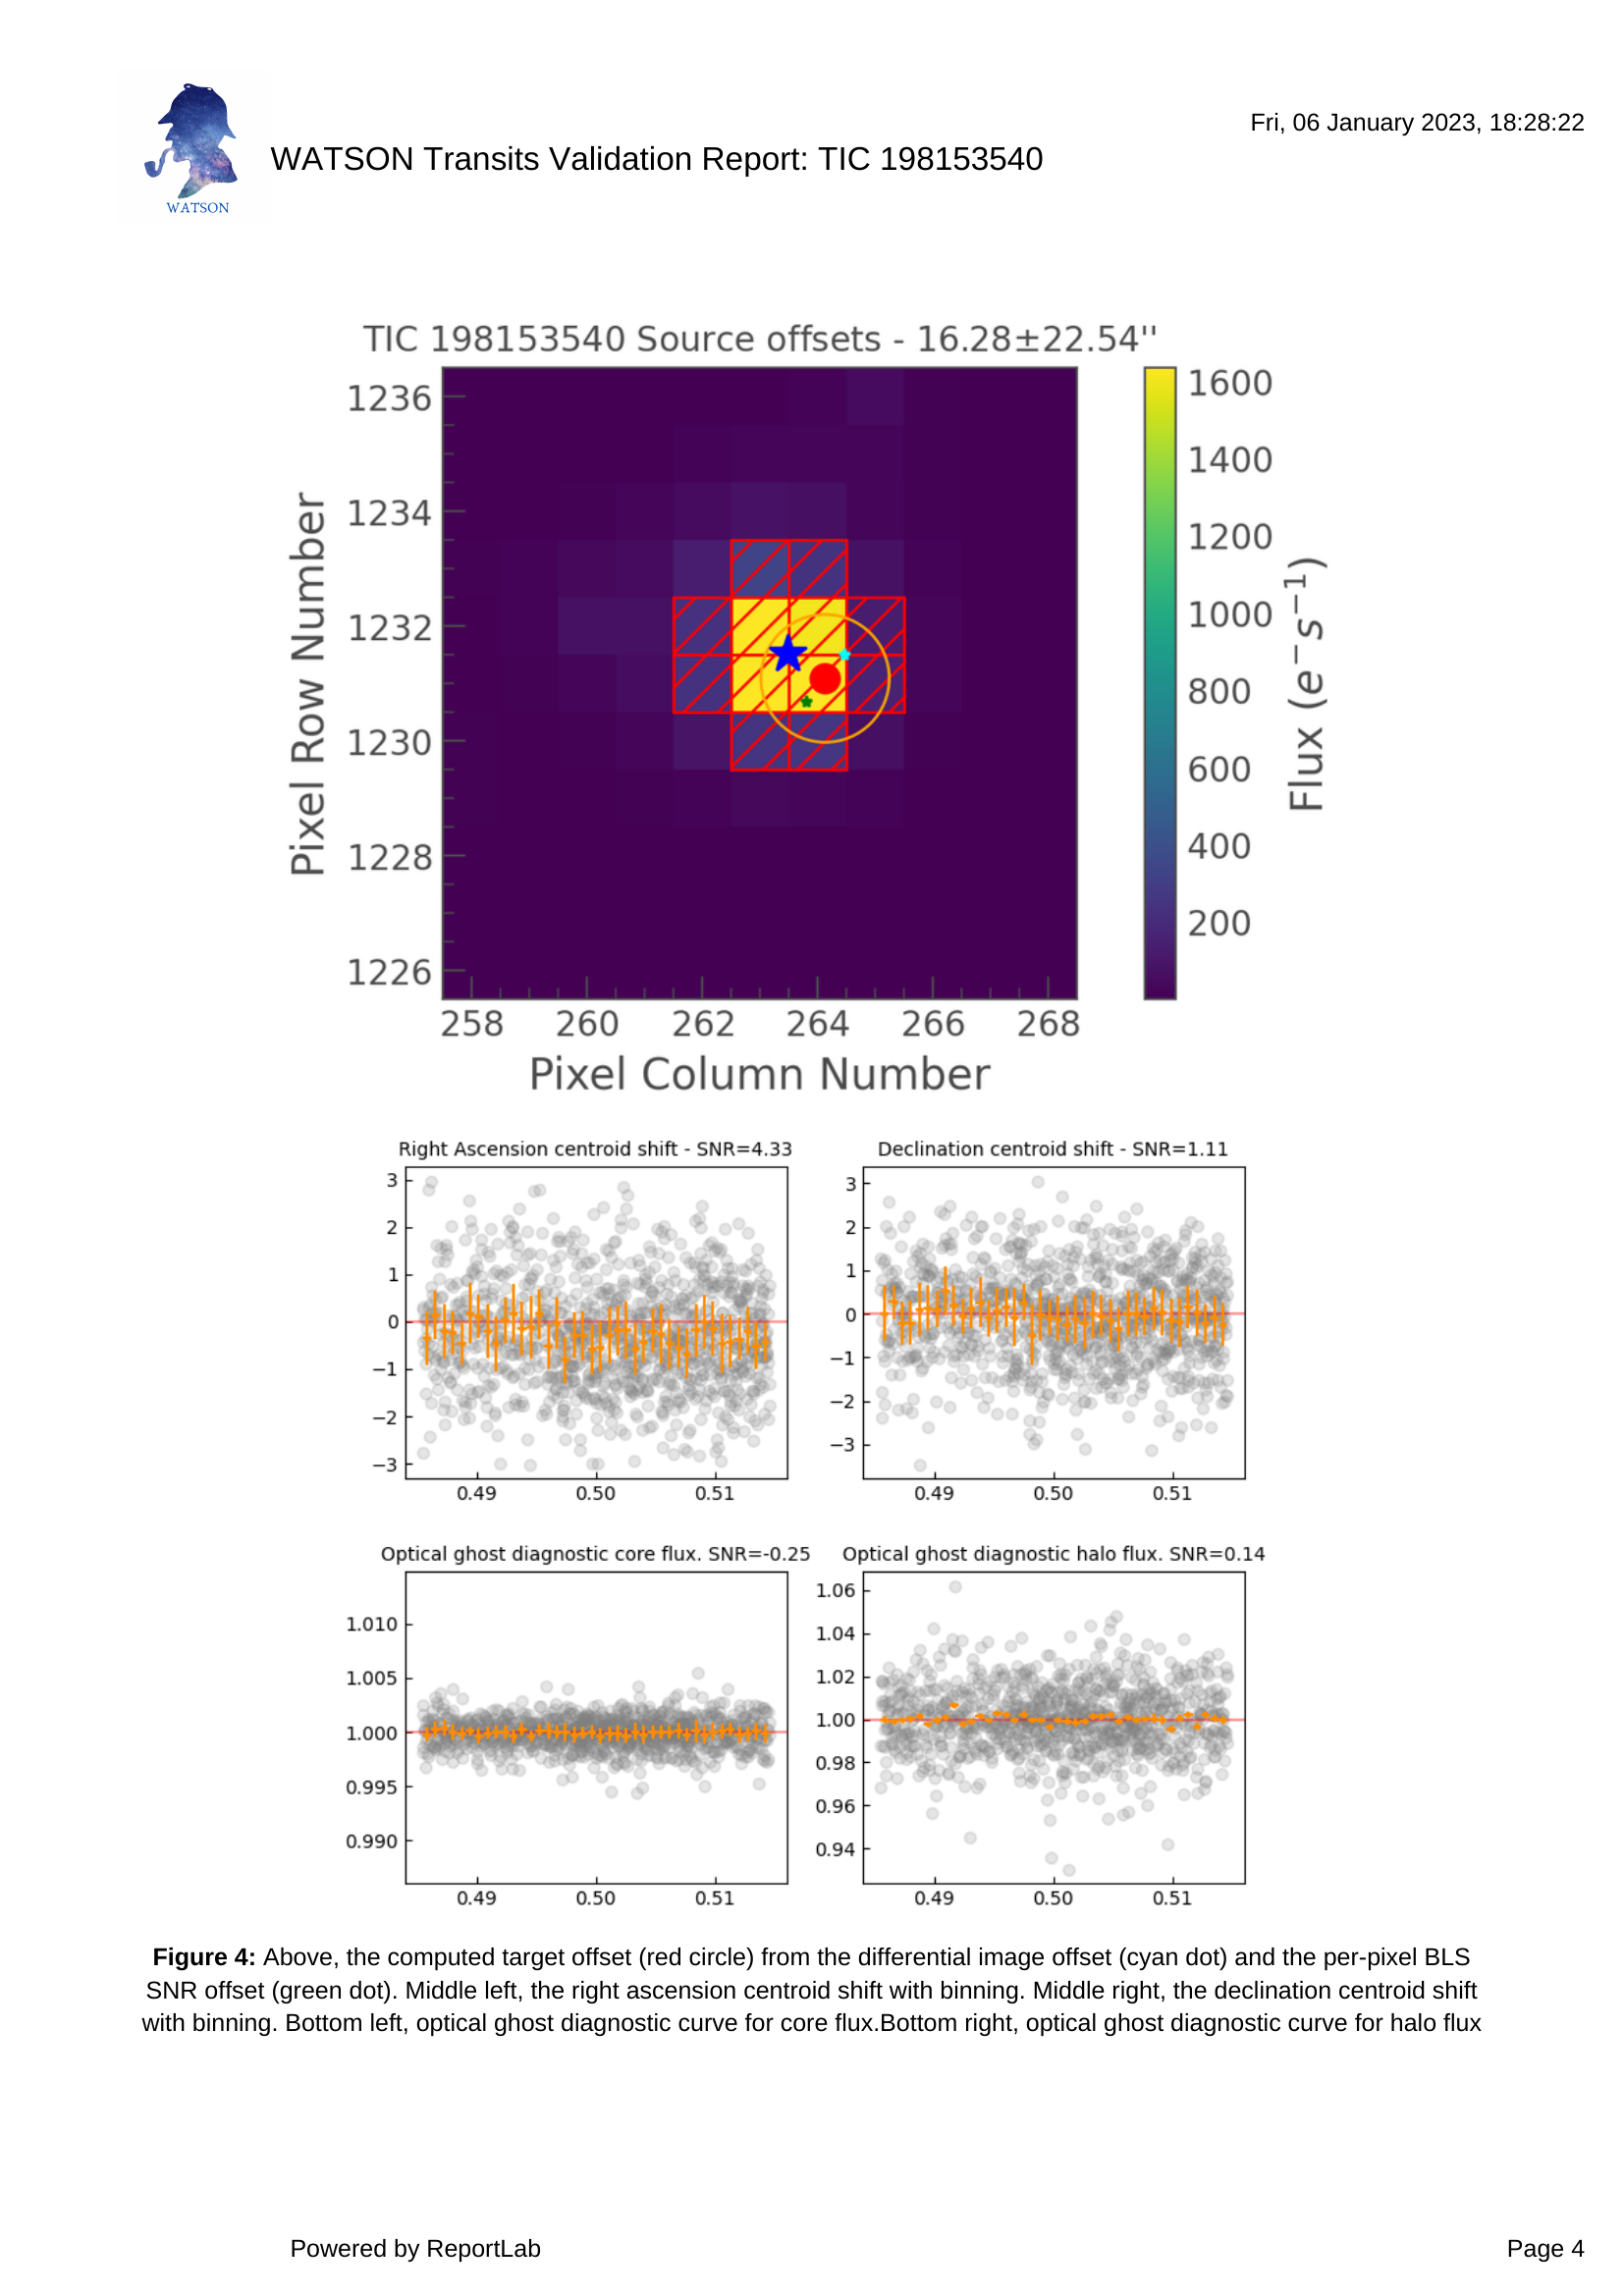

In [6]:
images[3]

We can't ensure that the `centroid_ra_snr` plot doesn't show a transit shape, but we can say that the curve is somehow chaotic and is not useful to extract meaningful information to rule out the candidate.

In conclusion, the only remaining metric alert that is significative is the `fast_snr` one. It is only one problematic and non self-conclusive metric and hence, we can't completely discard the candidate. However, it needs to be treated with much care and a validation procedure should not be trusted for confirmation, only an observational follow-up.